# Profile
Nama : Zuda Pradana Putra
Program : DTS FGA (Kominfo) 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import os
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
os.listdir('gdrive/My Drive/DTS FGA (Kominfo)/Machine Learning/Pengembangan/dataset')

['imdb_indonesian_movies_2.csv',
 'citrus.csv',
 'indonesian_movies.csv',
 'Chessman-image-dataset',
 'sentiment labelled sentences',
 'indonesian-news-title.csv']

In [3]:
df = pd.read_csv('gdrive/My Drive/DTS FGA (Kominfo)/Machine Learning/Pengembangan/dataset/indonesian-news-title.csv')

In [4]:
df.head()

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


In [5]:
# use columns
df = df[['title', 'category']]
df.head()

,title,category
0,Kemnaker Awasi TKA di Meikarta,finance
1,BNI Digitalkan BNI Java Jazz 2020,finance
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


news       32360
hot        16330
finance    14168
travel      6466
inet        5640
health      4919
oto         4383
food        4315
sport       2436
Name: category, dtype: int64


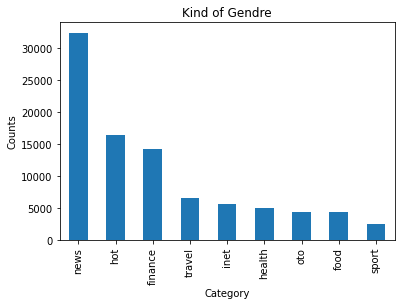

In [6]:
import matplotlib.pyplot as plt

plt.title('Kind of Gendre')
plt.xlabel('Category')
plt.ylabel('Counts')
df['category'].value_counts().plot(kind="bar")
plt.show
print(df['category'].value_counts())

In [7]:
# one hot encoding data kategorikal
category = pd.get_dummies(df.category)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='category')
df

,title,finance,food,health,hot,inet,news,oto,sport,travel
0,Kemnaker Awasi TKA di Meikarta,1,0,0,0,0,0,0,0,0
1,BNI Digitalkan BNI Java Jazz 2020,1,0,0,0,0,0,0,0,0
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",1,0,0,0,0,0,0,0,0
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,1,0,0,0,0,0,0,0,0
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
91012,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",0,0,0,0,0,0,0,0,1
91013,Foto: Bali & 9 Destinasi Paling Instagramable ...,0,0,0,0,0,0,0,0,1
91014,Game Bikin Turis Ini Liburan ke Jepang untuk.....,0,0,0,0,0,0,0,0,1
91015,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",0,0,0,0,0,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91017 entries, 0 to 91016
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    91017 non-null  object
 1   finance  91017 non-null  uint8 
 2   food     91017 non-null  uint8 
 3   health   91017 non-null  uint8 
 4   hot      91017 non-null  uint8 
 5   inet     91017 non-null  uint8 
 6   news     91017 non-null  uint8 
 7   oto      91017 non-null  uint8 
 8   sport    91017 non-null  uint8 
 9   travel   91017 non-null  uint8 
dtypes: object(1), uint8(9)
memory usage: 1.5+ MB


In [9]:
# delete columns title if has values NaN or Blank
df.dropna(subset=['title'], axis = 0, inplace=True)

In [10]:
df.shape

(91017, 10)

In [11]:
title = df['title'].values
label = df[['finance', 'food', 'health', 'hot', 'inet' , 'news', 'oto', 'sport', 'travel']].values
df

,title,finance,food,health,hot,inet,news,oto,sport,travel
0,Kemnaker Awasi TKA di Meikarta,1,0,0,0,0,0,0,0,0
1,BNI Digitalkan BNI Java Jazz 2020,1,0,0,0,0,0,0,0,0
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",1,0,0,0,0,0,0,0,0
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,1,0,0,0,0,0,0,0,0
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
91012,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",0,0,0,0,0,0,0,0,1
91013,Foto: Bali & 9 Destinasi Paling Instagramable ...,0,0,0,0,0,0,0,0,1
91014,Game Bikin Turis Ini Liburan ke Jepang untuk.....,0,0,0,0,0,0,0,0,1
91015,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",0,0,0,0,0,0,0,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(title, label, test_size=0.2)

In [13]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (72813,)
X_test_shape :  (18204,)
y_train_shape :  (72813, 9)
y_test_shape :  (18204, 9)


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=100000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)
 
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)
 
padded_train = pad_sequences(seq_train) 
padded_test = pad_sequences(seq_test)

In [15]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=100000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax') #count of label
])

In [16]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [17]:
# epochs akan berhenti jika mendapat akurasi yang telah ditentukan
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback() 

In [18]:
history = model.fit(padded_train, 
                    y_train, 
                    epochs= 30, 
                    validation_data=(padded_test, y_test),
                    verbose=2,
                    callbacks = [callbacks])

Epoch 1/30
2276/2276 - 72s - loss: 1.0533 - accuracy: 0.6306 - val_loss: 0.7212 - val_accuracy: 0.7641
Epoch 2/30
2276/2276 - 68s - loss: 0.5094 - accuracy: 0.8379 - val_loss: 0.5181 - val_accuracy: 0.8350
Epoch 3/30
2276/2276 - 66s - loss: 0.3380 - accuracy: 0.8946 - val_loss: 0.5138 - val_accuracy: 0.8406
Epoch 4/30
2276/2276 - 66s - loss: 0.2534 - accuracy: 0.9211 - val_loss: 0.5197 - val_accuracy: 0.8461
Epoch 5/30
2276/2276 - 67s - loss: 0.2010 - accuracy: 0.9381 - val_loss: 0.5467 - val_accuracy: 0.8441
Epoch 6/30
2276/2276 - 66s - loss: 0.1577 - accuracy: 0.9497 - val_loss: 0.5606 - val_accuracy: 0.8496
Epoch 7/30
2276/2276 - 66s - loss: 0.1322 - accuracy: 0.9575 - val_loss: 0.6283 - val_accuracy: 0.8495

Akurasi telah mencapai >95%!


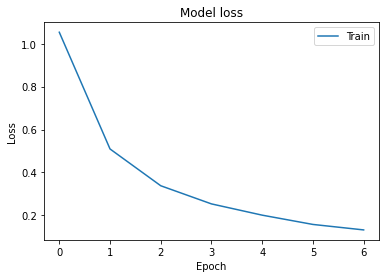

In [19]:
# memvisualisasikan Plot Loss dari Trained Model
# Plot ini sangat berguna untuk melihat proses keseluruhan pembelajaran model seiring waktu
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) #Objek history menampung informasi dari akurasi dan loss model pada setiap epoch di proses pelatihan.
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

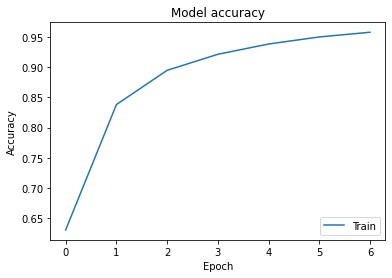

In [20]:
# memvisualisasikan Plot accuracy dari Trained Model
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()  